**Machine Learning Semester Project**

**Name**: Muhammad Aqeel  khan
**Roll no.** : NIM-BSMATH-2020-13
**Subject**:Machine Learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
train_data=pd.read_csv('./train.csv')
test_data=pd.read_csv('./test.csv')


In [3]:
test_data.head(6)


,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0
5,2,2.0,963.0,sqft,4753.00,sqft,98122,701000.0


In [4]:
train_data.head(10)

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0
5,2,2.0,1190.0,sqft,1.00,acre,98107,740000.0
6,1,1.0,670.0,sqft,6000.00,sqft,98133,460000.0
7,5,3.5,4510.0,sqft,6000.00,sqft,98105,3150000.0
8,3,2.5,1520.0,sqft,741.00,sqft,98108,565000.0
9,4,2.0,2340.0,sqft,9500.00,sqft,98178,699000.0


**Data Preprocessing**





In [5]:
train_data.shape,test_data.shape

((2016, 8), (505, 8))

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            505 non-null    int64  
 1   baths           505 non-null    float64
 2   size            505 non-null    float64
 3   size_units      505 non-null    object 
 4   lot_size        428 non-null    float64
 5   lot_size_units  428 non-null    object 
 6   zip_code        505 non-null    int64  
 7   price           505 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 31.7+ KB


In [8]:
np.where(train_data["size"] <= 0.0)


(array([], dtype=int64),)

In [9]:
train_data['size_units'].unique(),test_data['size_units'].unique()

(array(['sqft'], dtype=object), array(['sqft'], dtype=object))

In [10]:
train_data['lot_size_units'].unique(),test_data['lot_size_units'].unique()

(array(['sqft', 'acre', nan], dtype=object),
 array(['sqft', 'acre', nan], dtype=object))

In [11]:

# convert acre to Square feet in "lot_size" column
for i in range(len(train_data["lot_size"])):
    if train_data["lot_size_units"][i] == "acre":
        train_data["lot_size"][i] = train_data["lot_size"][i]*43560
    else:
        train_data["lot_size"][i]
print(train_data)


      beds  baths    size size_units  lot_size lot_size_units  zip_code  \
0        3    2.5  2590.0       sqft    6000.0           sqft     98144   
1        4    2.0  2240.0       sqft   13503.6           acre     98106   
2        4    3.0  2040.0       sqft    3783.0           sqft     98107   
3        4    3.0  3800.0       sqft    5175.0           sqft     98199   
4        2    2.0  1042.0       sqft       NaN            NaN     98102   
...    ...    ...     ...        ...       ...            ...       ...   
2011     3    2.0  1370.0       sqft   21780.0           acre     98112   
2012     1    1.0   889.0       sqft       NaN            NaN     98121   
2013     4    2.0  2140.0       sqft    6250.0           sqft     98199   
2014     2    2.0   795.0       sqft       NaN            NaN     98103   
2015     3    2.0  1710.0       sqft    4267.0           sqft     98133   

          price  
0      795000.0  
1      915000.0  
2      950000.0  
3     1950000.0  
4      95

<ipython-input-11-722a627fd179>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["lot_size"][i] = train_data["lot_size"][i]*43560


In [12]:
for i in range(len(test_data["lot_size"])):
    if test_data["lot_size_units"][i] == "acre":
        test_data["lot_size"][i] = test_data["lot_size"][i]*43560
    else:
        test_data["lot_size"][i]
print(test_data)

     beds  baths    size size_units  lot_size lot_size_units  zip_code  \
0       3    3.0  2850.0       sqft    4200.0           sqft     98119   
1       4    5.0  3040.0       sqft    5002.0           sqft     98106   
2       3    1.0  1290.0       sqft    6048.0           sqft     98125   
3       3    2.0  2360.0       sqft   12196.8           acre     98188   
4       3    3.5  1942.0       sqft    1603.0           sqft     98107   
..    ...    ...     ...        ...       ...            ...       ...   
500     5    4.5  5580.0       sqft   13068.0           acre     98146   
501     3    2.5  1390.0       sqft    1570.0           sqft     98126   
502     3    2.5  2950.0       sqft   20473.2           acre     98118   
503     5    5.0  3010.0       sqft    4887.0           sqft     98115   
504     3    2.0  1301.0       sqft    3000.0           sqft     98103   

         price  
0    1175000.0  
1    1057500.0  
2     799000.0  
3     565000.0  
4    1187000.0  
..       

<ipython-input-12-08611d847536>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["lot_size"][i] = test_data["lot_size"][i]*43560


In [13]:
test_data["lot_size_units"].unique(),train_data["lot_size_units"].unique()

(array(['sqft', 'acre', nan], dtype=object),
 array(['sqft', 'acre', nan], dtype=object))

In [14]:
# Drop the 'lot_size_unit' column
train_data.drop('lot_size_units', axis=1, inplace=True)
test_data.drop('lot_size_units', axis=1, inplace=True)
train_data.drop('size_units', axis=1, inplace=True)
test_data.drop('size_units', axis=1, inplace=True)


In [15]:
train_data.head()

,beds,baths,size,lot_size,zip_code,price
0,3,2.5,2590.0,6000.0,98144,795000.0
1,4,2.0,2240.0,13503.6,98106,915000.0
2,4,3.0,2040.0,3783.0,98107,950000.0
3,4,3.0,3800.0,5175.0,98199,1950000.0
4,2,2.0,1042.0,NaN,98102,950000.0


In [16]:
test_data.head()

,beds,baths,size,lot_size,zip_code,price
0,3,3.0,2850.0,4200.0,98119,1175000.0
1,4,5.0,3040.0,5002.0,98106,1057500.0
2,3,1.0,1290.0,6048.0,98125,799000.0
3,3,2.0,2360.0,12196.8,98188,565000.0
4,3,3.5,1942.0,1603.0,98107,1187000.0


In [17]:
test_data["zip_code"].unique()

array([98119, 98106, 98125, 98188, 98107, 98122, 98105, 98199, 98144,
       98121, 98136, 98104, 98112, 98109, 98102, 98126, 98168, 98103,
       98116, 98146, 98178, 98115, 98133, 98118, 98117, 98177, 98101,
       98108, 98164])

In [18]:
mean_iot_size=train_data['lot_size'].mean()
train_data['lot_size']=train_data['lot_size'].fillna(mean_iot_size)
train_data.isna().sum()

beds        0
baths       0
size        0
lot_size    0
zip_code    0
price       0
dtype: int64

In [19]:
mean_iot_size=test_data['lot_size'].mean()
test_data['lot_size']=test_data['lot_size'].fillna(mean_iot_size)
test_data.isna().sum()

beds        0
baths       0
size        0
lot_size    0
zip_code    0
price       0
dtype: int64

In [20]:



merged_data = pd.concat([train_data, test_data], ignore_index=True)



In [21]:

merged_data.head()

,beds,baths,size,lot_size,zip_code,price
0,3,2.5,2590.0,6000.000000,98144,795000.0
1,4,2.0,2240.0,13503.600000,98106,915000.0
2,4,3.0,2040.0,3783.000000,98107,950000.0
3,4,3.0,3800.0,5175.000000,98199,1950000.0
4,2,2.0,1042.0,18789.951947,98102,950000.0


In [22]:
merged_data.shape

(2521, 6)

In [23]:
features = ['beds', 'baths', 'size', 'lot_size','zip_code', 'price']

<ipython-input-24-e5903872b733>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[col], label="skew: " + str(np.round(train_data[col].skew(),2)))


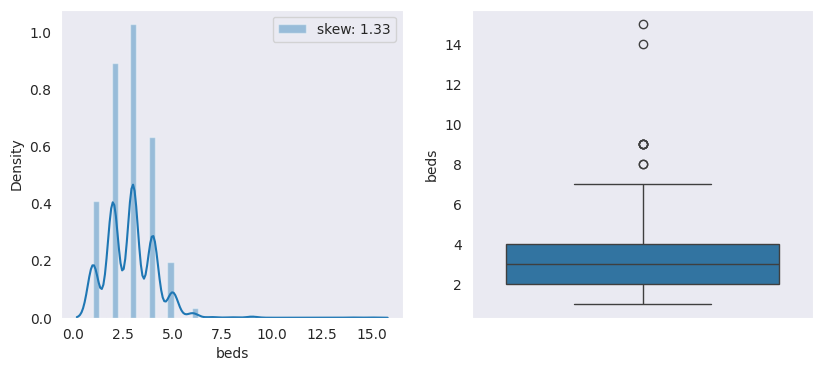

<ipython-input-24-e5903872b733>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[col], label="skew: " + str(np.round(train_data[col].skew(),2)))


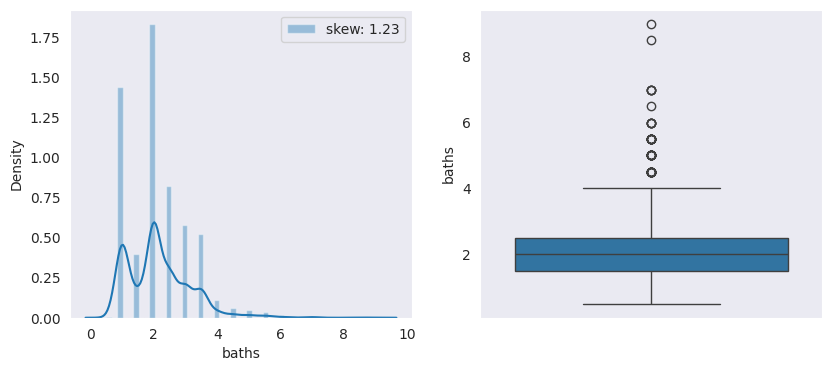

<ipython-input-24-e5903872b733>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[col], label="skew: " + str(np.round(train_data[col].skew(),2)))


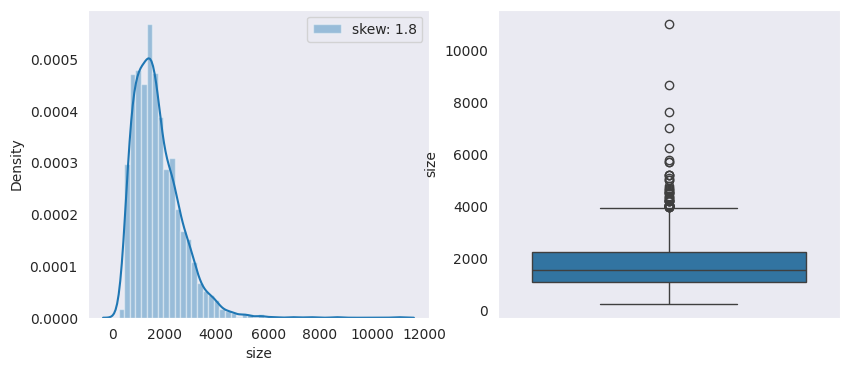

<ipython-input-24-e5903872b733>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[col], label="skew: " + str(np.round(train_data[col].skew(),2)))


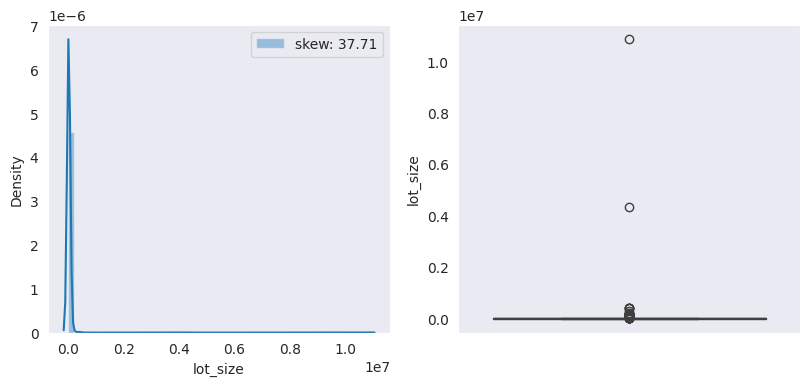

<ipython-input-24-e5903872b733>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[col], label="skew: " + str(np.round(train_data[col].skew(),2)))


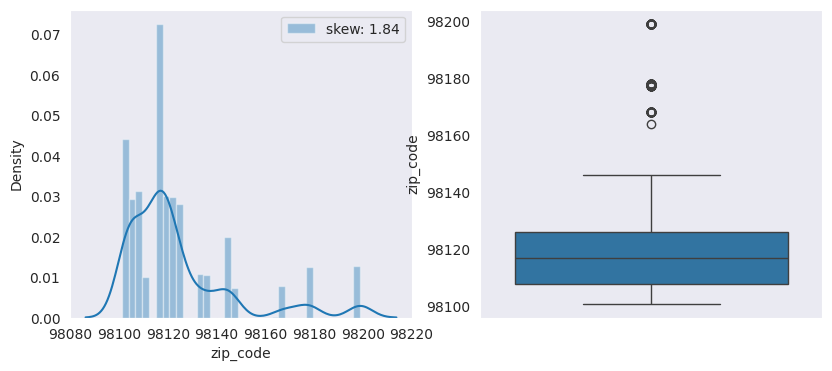

<ipython-input-24-e5903872b733>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[col], label="skew: " + str(np.round(train_data[col].skew(),2)))


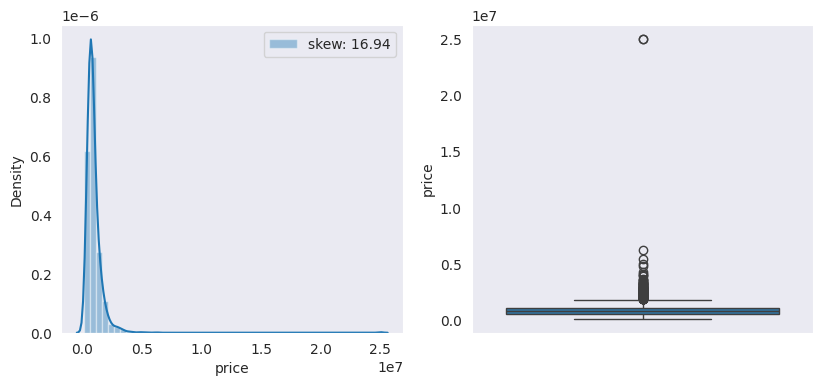

In [24]:

sns.set_style('dark')
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(132)
    sns.distplot(train_data[col], label="skew: " + str(np.round(train_data[col].skew(),2)))
    plt.legend()
    plt.subplot(133)
    sns.boxplot(train_data[col])

    plt.show()



In [25]:
 def iqr_capping(df, cols, factor):
     for col in cols:
         q1 = df[col].quantile(0.25)
         q3 = df[col].quantile(0.75)

         iqr = q3 - q1
         upper_whisker = q3 + (factor*iqr)
         lower_whisker = q1 - (factor*iqr)
         print(df[col] < lower_whisker)
         print(df[col] > upper_whisker)
         df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [26]:
features = ['size','price']
iqr_capping(merged_data, features, 1.5)

0       False
1       False
2       False
3       False
4       False
        ...  
2516    False
2517    False
2518    False
2519    False
2520    False
Name: size, Length: 2521, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
2516     True
2517    False
2518    False
2519    False
2520    False
Name: size, Length: 2521, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
2516    False
2517    False
2518    False
2519    False
2520    False
Name: price, Length: 2521, dtype: bool
0       False
1       False
2       False
3        True
4       False
        ...  
2516     True
2517    False
2518     True
2519    False
2520    False
Name: price, Length: 2521, dtype: bool


In [27]:
# Mean and standard deviation values
mean = merged_data.mean()
std = merged_data.std()

# Set the threshold for identifying outliers
threshold = 3

outlier_indices = []

# Specify the columns to exclude
exclude_columns = ["size", "price"]

for column in merged_data.columns:
    if column not in exclude_columns:
        z = (merged_data[column] - mean[column]) / std[column]

        # Identify outliers and replace them with the threshold values
        merged_data[column] = np.where(z > threshold, 3, np.where(z < -threshold, -3, merged_data[column]))

# Print the DataFrame after replacing outliers
print("DataFrame after replacing outliers:")
print(merged_data)


DataFrame after replacing outliers:
      beds  baths    size      lot_size  zip_code      price
0        3    2.5  2590.0   6000.000000     98144   795000.0
1        4    2.0  2240.0  13503.600000     98106   915000.0
2        4    3.0  2040.0   3783.000000     98107   950000.0
3        4    3.0  3800.0   5175.000000         3  1880000.0
4        2    2.0  1042.0  18789.951947     98102   950000.0
...    ...    ...     ...           ...       ...        ...
2516     5    4.5  4046.0  13068.000000     98146  1880000.0
2517     3    2.5  1390.0   1570.000000     98126   575000.0
2518     3    2.5  2950.0  20473.200000     98118  1880000.0
2519     5    5.0  3010.0   4887.000000     98115  1807000.0
2520     3    2.0  1301.0   3000.000000     98103   895000.0

[2521 rows x 6 columns]


In [28]:
merged_data["price"] = np.log(merged_data["price"])
merged_data["zip_code"] = np.log(merged_data["zip_code"])
merged_data["beds"] = np.log(merged_data["beds"])
merged_data["baths"] = np.log(merged_data["baths"])
merged_data["size"] = np.log(merged_data["size"])
merged_data["lot_size"] = np.log(merged_data["lot_size"])






**Exploratory Data Analysis**

In [29]:

correlation_matrix = merged_data.corr(method='pearson')
#print("Pearson correlation matrix:\n", correlation_matrix)

<Axes: >

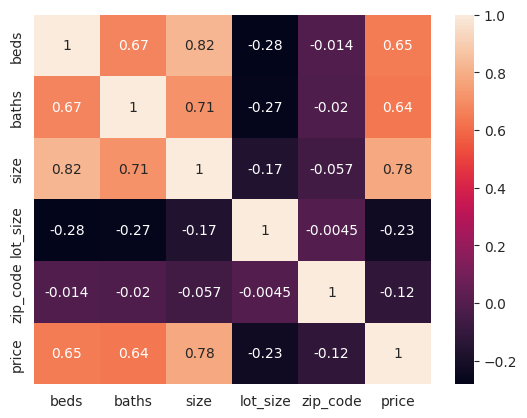

In [30]:
corr = merged_data.corr()
sns.heatmap(corr, annot = True)

<Axes: >

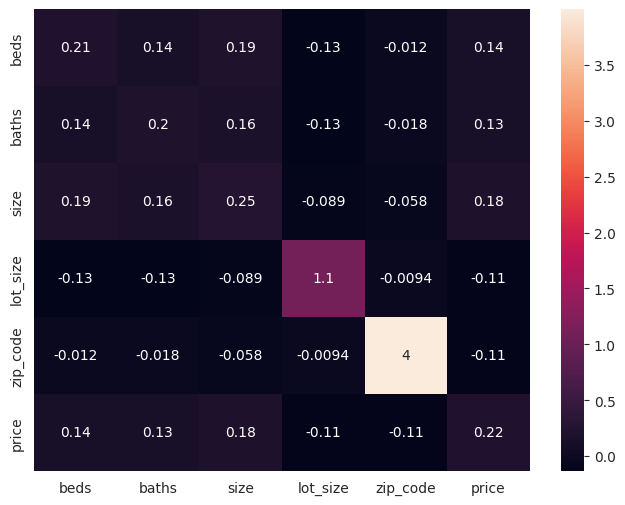

In [31]:
cov_mat = merged_data.cov()
plt.figure(figsize = (8,6))
sns.heatmap(cov_mat, annot= True)

In [32]:
merged_data.describe()

,beds,baths,size,lot_size,zip_code,price
count,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000
mean,0.948976,0.663429,7.340668,8.663813,11.093977,13.609318
std,0.456995,0.444044,0.504406,1.044614,1.999882,0.468911
min,0.000000,-0.693147,5.521461,1.098612,1.098612,11.976659
25%,0.693147,0.405465,6.990257,8.188689,11.493814,13.312984
50%,1.098612,0.693147,7.365180,8.670601,11.493916,13.608486
75%,1.386294,0.916291,7.727535,9.202107,11.493997,13.924365
max,1.791759,1.609438,8.305484,12.901098,11.494639,14.446782


In [33]:
fig = px.scatter_matrix(merged_data,height = 1000)
fig.show()

**Relation ship B/W label and features**

0.6451535129077259


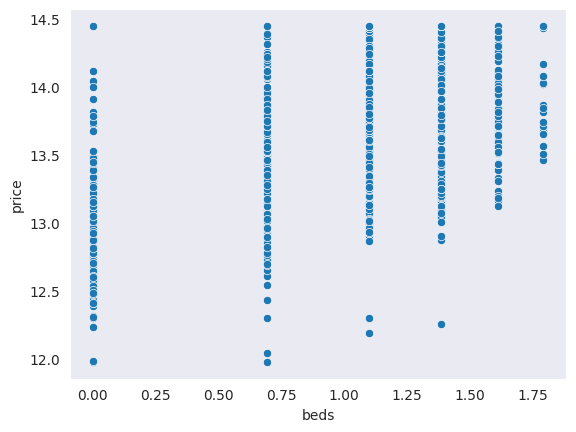

0.6383425442532712


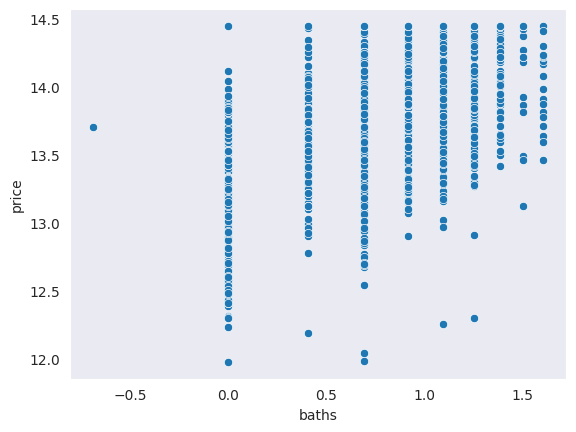

0.7821587538411022


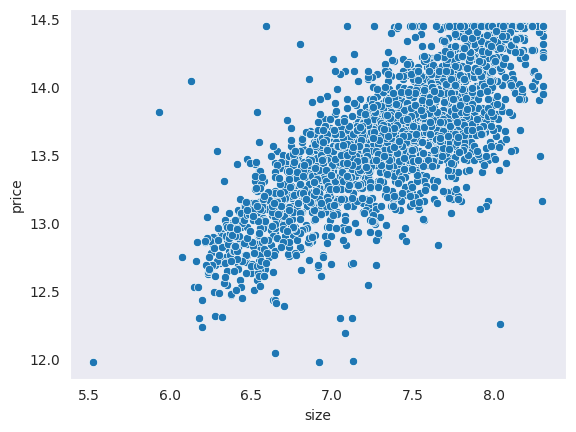

-0.22977224602705548


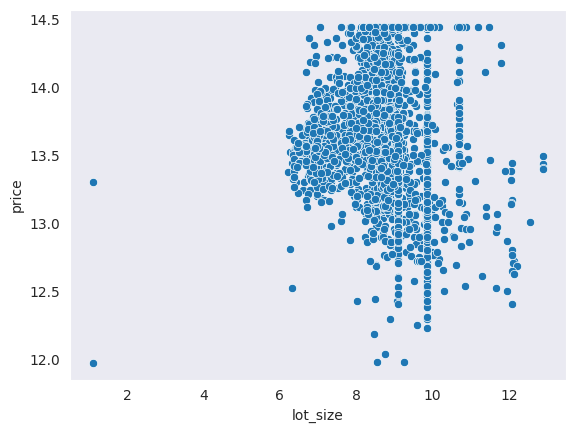

In [34]:
features = ['beds', 'baths', 'size','lot_size']

for col in features:
  sns.scatterplot(x = merged_data[col],y = merged_data['price'])
  print(merged_data[col].corr(merged_data['price']))
  plt.show()

Model Implementation for Regression

**linear Regression**

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
X = merged_data[[ "beds","baths","size","lot_size","zip_code"]]
y = merged_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
meu=mean_squared_error(y_test, predictions)
print(f'R^2 Score: {r2}')
print("mean_squared_error",meu)


R^2 Score: 0.638853727393857
mean_squared_error 0.08004789055135317


**Random Forest Regressor**

In [36]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
X = merged_data[[ "beds","baths","size","lot_size","zip_code"]]
y = merged_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest regressor
rf = RandomForestRegressor(n_estimators=200)
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)




In [37]:
#  model performance
r2 = r2_score(y_test, y_pred)
meu=mean_squared_error(y_test, y_pred)
print("R-squared:", r2)
print("mean_squared_error",meu)

R-squared: 0.7405072446307914
mean_squared_error 0.05751643933846365


In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
X = merged_data[["beds", "baths", "size", "lot_size", "zip_code"]]
y = merged_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [39]:
# Evaluate the performance of the model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.08630766940402376
R-squared: 0.6205088140713818


**Visualization**

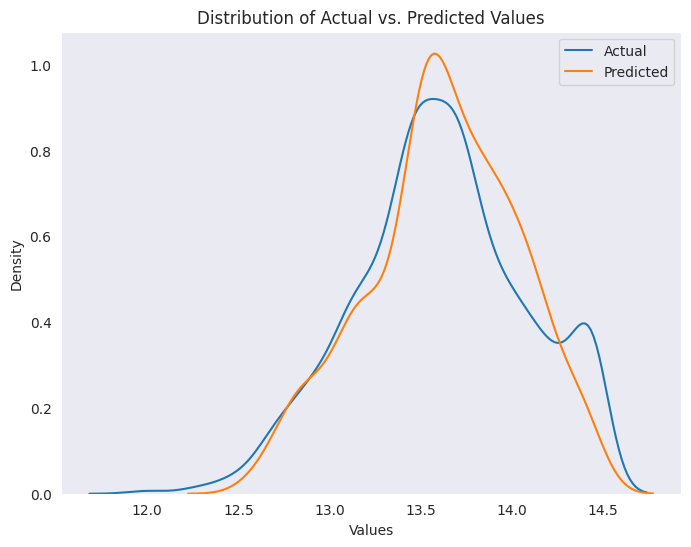

In [40]:
predicted_values = rf.predict(X_test)
plt.figure(figsize=(8, 6))
sns.kdeplot(merged_data['price'], label='Actual')
sns.kdeplot(predicted_values, label='Predicted')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Actual vs. Predicted Values')
plt.legend()
plt.show()


In [41]:
print(predictions)

[13.5398473  13.90553522 13.62684994 13.49048447 13.68304455 13.31854397
 13.71229724 13.67417975 13.71792479 13.51769357 14.09604966 13.1472117
 13.4532686  13.97007938 13.25913    13.12030791 13.81551887 13.97454635
 13.71495236 14.05734808 13.77407956 13.82129399 13.20082504 13.97486214
 12.94133217 13.01948388 13.86100368 14.05397654 13.97737535 13.20882346
 13.97314008 13.90332575 13.53063804 13.91269877 13.81344488 14.20844531
 14.00159762 13.39081439 13.38702108 13.19276307 13.20514492 13.80961427
 13.08589853 12.90776013 13.83755806 13.9881537  14.21698275 13.07132161
 13.19800459 12.9143446  13.46621649 13.17488692 13.66860186 13.43454149
 13.35237308 13.95141493 13.42019045 13.48030585 13.05263367 13.88994829
 13.32449397 14.25803189 13.75390832 13.60289092 12.86479412 13.42217154
 14.10082089 13.66890404 13.34997689 13.79173428 13.86311595 13.539404
 13.68321704 12.89074753 13.47918354 13.83083198 13.88399455 13.55115073
 13.46345448 13.76806713 13.82634313 14.01546829 13.50

In [42]:
print(y_test)

196     13.527695
986     13.592367
1090    13.422468
387     13.304602
2222    13.779883
          ...    
1050    12.524526
1566    13.854731
514     12.768542
409     13.742940
1560    13.541074
Name: price, Length: 757, dtype: float64


**Classification**

In [43]:
#import pandas as pd

# Define the percentile thresholds
#percentile_thresholds = [0.25, 0.50, 0.75]

# Calculate the percentiles for the "price" column
#percentiles = merged_data['price'].quantile(percentile_thresholds)

# Define a function to assign the class based on the price value
#def assign_class(price):
    #if price <= percentiles[0.25]:
        #return "low_class"
    #elif price <= percentiles[0.50]:
        #return "medium_class"
    #elif price <= percentiles[0.75]:
        #return "upper_class"
    #else:
        #return "high_upper_class"

# Apply the function to the "price" column and create a new column "class"
#merged_data['class'] = merged_data['price'].apply(assign_class)


**Preprocessing for Classification**

In [44]:
num_bins = 3
merged_data['class'] = pd.cut(merged_data['price'], bins=num_bins, labels=[0, 1, 2, ])
#merged_data['class'] = pd.qcut(merged_data['price'], q=[0, 1/3, 2/3, 1], labels=[0, 1, 2])
merged_data[['price', 'class']]


,price,class
0,13.586097,1
1,13.726679,2
2,13.764217,2
3,14.446782,2
4,13.764217,2
...,...,...
2516,14.446782,2
2517,13.262125,1
2518,14.446782,2
2519,14.407179,2


In [45]:
merged_data[['price','class']].head(20)


,price,class
0,13.586097,1
1,13.726679,2
2,13.764217,2
3,14.446782,2
4,13.764217,2
5,13.514405,1
6,13.038982,1
7,14.446782,2
8,13.244581,1
9,13.457406,1


In [46]:
merged_data['class'].unique()

[1, 2, 0]
Categories (3, int64): [0 < 1 < 2]

<Axes: xlabel='class', ylabel='count'>

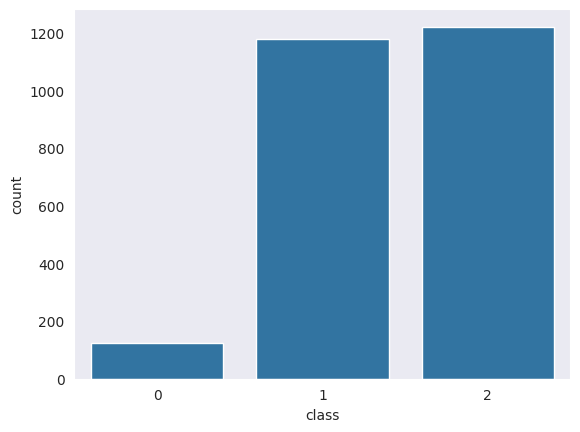

In [47]:
sns.countplot(data = merged_data, x = 'class')

**Model Implementation for Classification**

**Random Forest**

In [48]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = merged_data[[ "beds","baths","size" ,"lot_size","zip_code"]]
y = merged_data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [49]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [50]:
# Evaluate model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)  # View class-wise performance
#print("R-squared:", r2)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8163804491413474
Confusion Matrix:
 [[ 19  20   0]
 [  4 283  54]
 [  1  60 316]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.49      0.60        39
           1       0.78      0.83      0.80       341
           2       0.85      0.84      0.85       377

    accuracy                           0.82       757
   macro avg       0.81      0.72      0.75       757
weighted avg       0.82      0.82      0.81       757



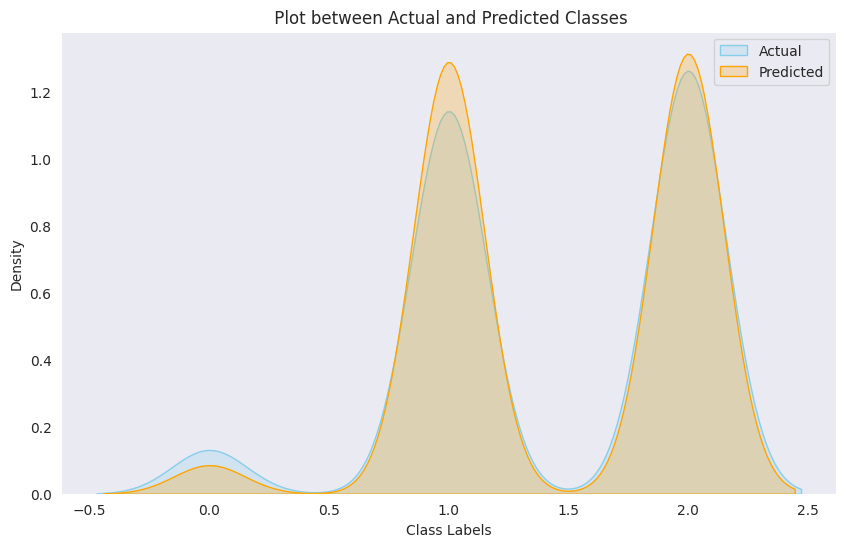

In [51]:


visiualize = merged_data.to_dict()
visiualize['Actual'] = y_test
visiualize['Predicted'] = y_pred
visiualize['Actual'] = pd.to_numeric(visiualize['Actual'])

# Plot the KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=visiualize, x='Actual', fill=True, label='Actual', color='skyblue')
sns.kdeplot(data=visiualize, x='Predicted', fill=True, label='Predicted', color='orange')
plt.title(' Plot between Actual and Predicted Classes')
plt.xlabel('Class Labels')
plt.legend()
plt.show()

**Decision Tree**


In [52]:
from sklearn.tree import DecisionTreeClassifier
X = merged_data[[ "beds","baths","size" ,"lot_size","zip_code"]]
y = merged_data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [53]:
# Evaluate model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7702970297029703
Confusion Matrix:
 [[ 10  14   0]
 [  8 171  42]
 [  2  50 208]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.42      0.45        24
           1       0.73      0.77      0.75       221
           2       0.83      0.80      0.82       260

    accuracy                           0.77       505
   macro avg       0.69      0.66      0.67       505
weighted avg       0.77      0.77      0.77       505



**KNN classifeir**

In [54]:


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X = merged_data[[ "beds","baths","size" ,"lot_size","zip_code"]]
y = merged_data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)




In [55]:
# Evaluate model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7287128712871287
Confusion Matrix:
 [[  6  17   1]
 [  2 174  45]
 [  0  72 188]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.25      0.38        24
           1       0.66      0.79      0.72       221
           2       0.80      0.72      0.76       260

    accuracy                           0.73       505
   macro avg       0.74      0.59      0.62       505
weighted avg       0.74      0.73      0.72       505



**Naive bayes Classifier**

In [56]:

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = merged_data[["beds", "baths", "size", "lot_size", "zip_code"]]
y = merged_data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)



In [57]:
# Evaluate model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.695049504950495
Confusion Matrix:
 [[ 18   5   1]
 [ 33 127  61]
 [  1  53 206]]
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.75      0.47        24
           1       0.69      0.57      0.63       221
           2       0.77      0.79      0.78       260

    accuracy                           0.70       505
   macro avg       0.60      0.71      0.63       505
weighted avg       0.71      0.70      0.70       505



**Relation ship b/w price and class**

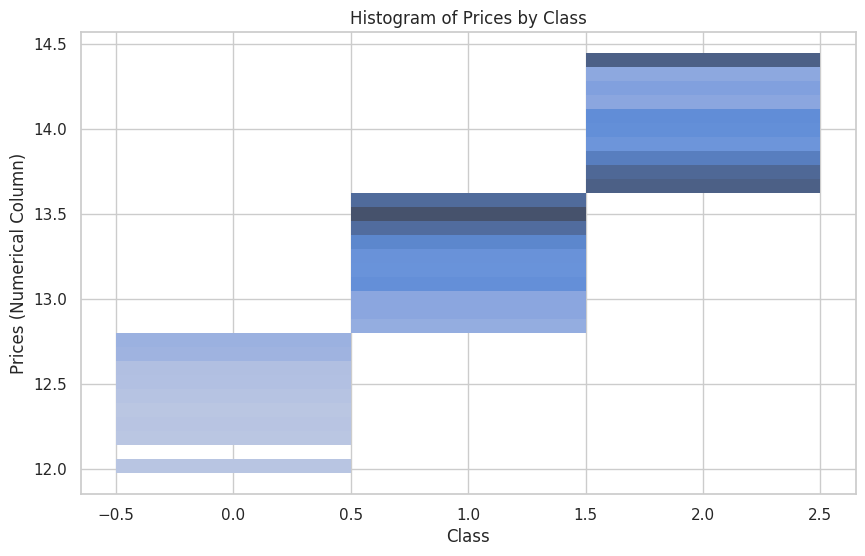

In [58]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='class', y='price', bins=30, kde=True)
plt.title('Histogram of Prices by Class')
plt.xlabel('Class')
plt.ylabel('Prices (Numerical Column)')
plt.show()


**Features contribuation in classification of Houses**

features importances in classification of houses during decision tree classification Algorithm


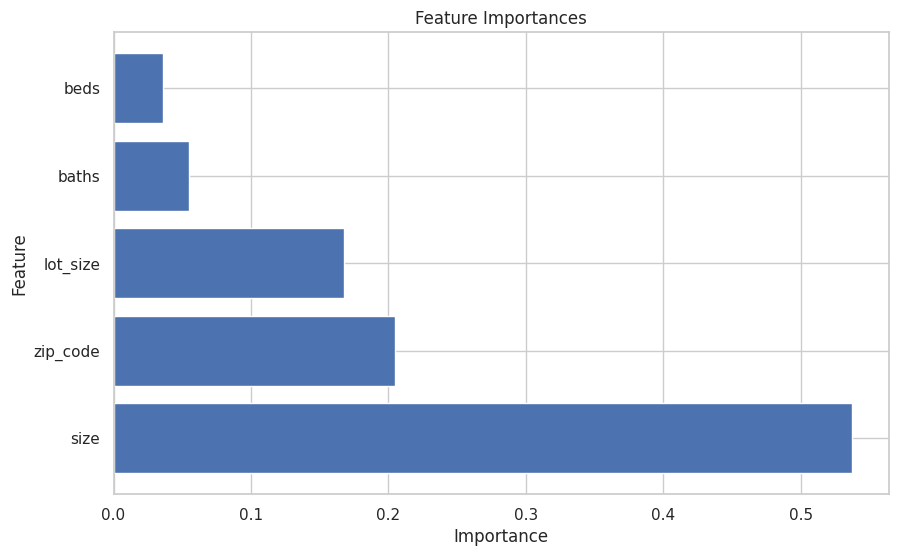

In [59]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

features = ["beds", "baths", "size", "lot_size", "zip_code"]
X = merged_data[features]
y = merged_data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Plot feature importances for the Random Forest model
def plot_feature_importances(model, feature_names):
    feature_importances = model.feature_importances_
    features_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    features_df = features_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(features_df['Feature'], features_df['Importance'])
    plt.title('Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# Plot feature importances for Decision Tree model
print("features importances in classification of houses during decision tree classification Algorithm")
plot_feature_importances(dt_model, features)




features importances in classification of houses during random forest classification Algorithm


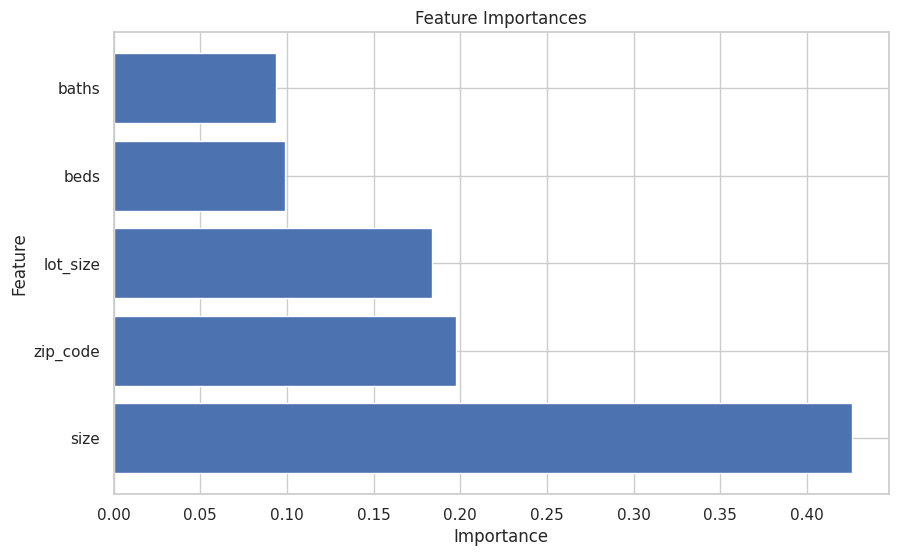

In [60]:
print("features importances in classification of houses during random forest classification Algorithm")
plot_feature_importances(rf_model, features)